# SVM(Support Vector Machine)

### : Classification : 예측하려는 대상의 속성을 입력받고, 종속변수가 갖고 있는 카테고리(범주형)
###        값중에서 어느 한 부류로 분류로 예측한다.
### : 지도학습(고객분류,질병진단, 스팸메일 필터링, 음성인식)
### : KNN, SVM, Decision Tree,  Logistic Regression

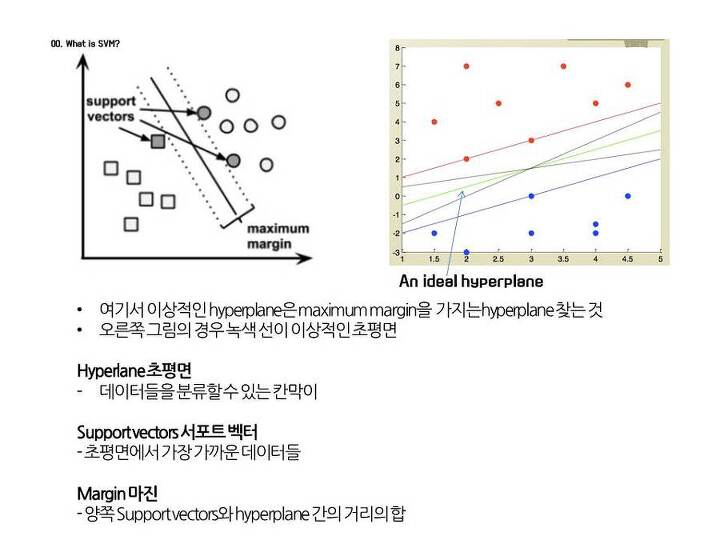

In [1]:
from IPython.display import Image
Image("datasets/svm02.jpg")

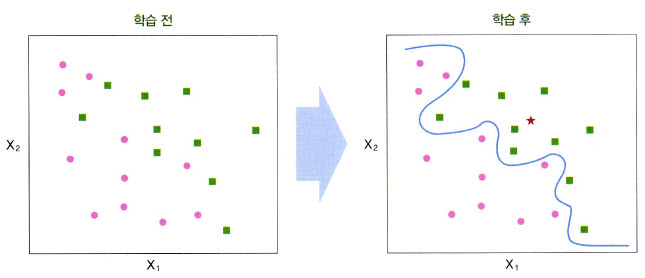

In [1]:
from IPython.display import Image
Image("datasets/svm01.jpg")

In [2]:
import pandas as pd
import seaborn as sns

### Step1 :: 데이터 준비-Seaborn에서 제공하는 titanic 데이터셋 가져오기

In [3]:
# load_dataset 힘수를 이용해서 DataFrame으로 변환
df=sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### Step2:: 테이터 탐색

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       889 non-null object
class          891 non-null category
who            891 non-null object
adult_male     891 non-null bool
deck           203 non-null category
embark_town    889 non-null object
alive          891 non-null object
alone          891 non-null bool
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [5]:
pd.set_option('display.max_columns',15)

In [6]:
#NaN값이 많은 deck열 삭제, embarked와 내용이 겹치는 embark_town 삭제
rdf=df.drop(['deck','embark_town'], axis=1)
rdf.columns.values

array(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'alive', 'alone'],
      dtype=object)

In [7]:
#age열에 나이 데이터가 없는 모든 행을 삭제(891중에서 177개 NaN)
rdf=rdf.dropna(subset=['age'], how='any', axis=0)
len(rdf)

714

In [8]:
#embarked열의 NaN값을 승선도시 중에서 가장 많이 출현한 값으로 치환하기
most_freq=rdf['embarked'].value_counts(dropna=True).idxmax()
most_freq

'S'

In [9]:
rdf.describe(include='all')

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alive,alone
count,714.000000,714.000000,714,714.000000,714.000000,714.000000,714.000000,712,714,714,714,714,714
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,no,True
freq,NaN,NaN,453,NaN,NaN,NaN,NaN,554,355,413,413,424,404
mean,0.406162,2.236695,NaN,29.699118,0.512605,0.431373,34.694514,NaN,NaN,NaN,NaN,NaN,NaN
std,0.491460,0.838250,NaN,14.526497,0.929783,0.853289,52.918930,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,1.000000,NaN,20.125000,0.000000,0.000000,8.050000,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,2.000000,NaN,28.000000,0.000000,0.000000,15.741700,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,1.000000,33.375000,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
rdf['embarked'].fillna(most_freq,inplace=True)

### Step3 ::분석에 사용할 속성을 선택

In [11]:
ndf=rdf[['survived','pclass', 'sex','age','sibsp', 'parch','embarked']]
ndf.head()

,survived,pclass,sex,age,sibsp,parch,embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [12]:
#one-hot-encoding- 범주형데이터를 모델이 인식할수 있도록 숫자형으로 변환
onehot_sex=pd.get_dummies(ndf['sex'])
ndf=pd.concat([ndf, onehot_sex], axis=1)

In [13]:
onehot_embarked=pd.get_dummies(ndf['embarked'], prefix='town')
ndf=pd.concat([ndf, onehot_embarked], axis=1)

In [14]:
ndf.drop(['sex','embarked'], axis=1, inplace=True)
ndf.head()

,survived,pclass,age,sibsp,parch,female,male,town_C,town_Q,town_S
0,0,3,22.0,1,0,0,1,0,0,1
1,1,1,38.0,1,0,1,0,1,0,0
2,1,3,26.0,0,0,1,0,0,0,1
3,1,1,35.0,1,0,1,0,0,0,1
4,0,3,35.0,0,0,0,1,0,0,1


### Step4 : 데이터 셋 구분- train data/ test data

In [15]:
# 속성(변수) 선택
X=ndf[['pclass','age','sibsp','parch','female','male','town_C','town_Q','town_S']] #독립변수
y=ndf['survived'] #종속변수

In [16]:
#설명변수 데이터를 정규화
from sklearn import preprocessing #전처리
X=preprocessing.StandardScaler().fit(X).transform(X)

In [17]:
#train data & test구분 (7:3 비율)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

print("train data: ", X_train.shape) # 변경
print("test data: ", X_test.shape)    # 변경

train data:  (499, 9)
test data:  (215, 9)


### Step5: SVM분류모델- sklearn 사용

In [18]:
#sklearn 라이브러리에서  분류모델 가져오기(SVM)
from sklearn import svm

In [19]:
# 모델 객체 생성(kernel='rbf' 적용)
# kernel : 데이터를 vector공간으로 매핑하는 함수
#              RBF(Radial Basic Function:곡선),Linear, Polynomial, Sigmoid
svm_model=svm.SVC(kernel='rbf')

In [20]:
svm_model.fit(X_train, y_train)   #model fitting(모델 학습)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [21]:
#test data를 가지고 y_hat을 예측(분류)
y_hat=svm_model.predict(X_test)

In [22]:
print(y_hat[0:10])
print(y_test.values[0:10])

[0 0 1 0 0 0 1 0 0 0]
[0 0 1 0 0 1 1 1 0 0]


In [23]:
#모델 성능 평가-Confusion Matrix(혼동행렬) 계산
#혼동행렬: 머신러닝 맞추었는지, 혼동했는지 판단 하는 행렬
#              : 예측값에는 2가지(True/False)- TP FP,FN,TN  (P:positive, N:negative)
from sklearn import metrics
svm_matrix=metrics.confusion_matrix(y_test, y_hat)
svm_matrix

array([[120,   5],
       [ 35,  55]], dtype=int64)

In [24]:
#모델 성능 평가-평가 지표 계산
#Precison(정확도): True로 예측한 분석대상중에서 실제값이 True인 비율(정확성)
#Recall(재현율): 실제값이 True인 분석 대상 중에서 True로 예측하여 모델에 적중한 비율
#F1-Score(F1지표):정확도와 재현율이 균등하게 반영된 조화평균
svm_report=metrics.classification_report(y_test, y_hat)
print(svm_report)

             precision    recall  f1-score   support

          0       0.77      0.96      0.86       125
          1       0.92      0.61      0.73        90

avg / total       0.83      0.81      0.81       215

